Atividade sobre Predição de subida ou queda de posições de músicas na Billboard Hot 50

Aluno: Bruno Felipe Soares Santos
bfss@cesar.school

A base de dados é do Kaggle

https://www.kaggle.com/datasets/ludmin/billboard?select=streaming_songs.csv

# Import de biliotecas

In [ ]:
!pip install tsai

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsai.all import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import de dataset

In [ ]:
# Carregando o dataset
df = pd.read_csv('/content/drive/MyDrive/10. Séries Temporais/streaming_songs.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30900 entries, 0 to 30899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             30900 non-null  object
 1   Song             30900 non-null  object
 2   Artist           30900 non-null  object
 3   Rank             30900 non-null  int64 
 4   Last Week        30900 non-null  int64 
 5   Peak Position    30900 non-null  int64 
 6   Weeks in Charts  30900 non-null  object
 7   Image URL        30900 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [ ]:
df.head(10)

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
0,2013-01-23,Thrift Shop,Macklemore & Ryan Lewis Featuring Wanz,1,1,1,-,https://charts-static.billboard.com/img/2012/09/macklemore-ryan-lewis-79t-thriftshop-0bd-180x180.jpg
1,2013-01-23,Locked Out Of Heaven,Bruno Mars,2,2,1,-,https://charts-static.billboard.com/img/2012/10/bruno-mars-c75-lockedoutofheaven-fgw-180x180.jpg
2,2013-01-23,Diamonds,Rihanna,3,3,1,-,https://charts-static.billboard.com/img/2012/10/rihanna-k0p-diamonds-wld-180x180.jpg
3,2013-01-23,Ho Hey,The Lumineers,4,4,1,-,https://charts-static.billboard.com/img/2012/04/the-lumineers-3ig-180x180.jpg
4,2013-01-23,It's Time,Imagine Dragons,5,5,1,-,https://charts-static.billboard.com/img/1840/12/imagine-dragons-hy6-180x180.jpg
5,2013-01-23,Don't You Worry Child,Swedish House Mafia Featuring John Martin,6,6,1,-,https://charts-static.billboard.com/img/2012/09/swedish-house-mafia-ep7-106x106.jpg
6,2013-01-23,Radioactive,Imagine Dragons,7,7,1,-,https://charts-static.billboard.com/img/2012/08/imagine-dragons-ud7-radioactive-qrr-180x180.jpg
7,2013-01-23,Swimming Pools (Drank),Kendrick Lamar,8,8,1,-,https://charts-static.billboard.com/img/2012/08/kendrick-lamar-atc-swimmingpoolsdrank-9i9-180x180.jpg
8,2013-01-23,Scream & Shout,will.i.am & Britney Spears,9,9,1,-,https://charts-static.billboard.com/img/2012/12/william-eaz-106x106.jpg
9,2013-01-23,F**kin Problems,A$AP Rocky Featuring Drake| 2 Chainz & Kendrick Lamar,10,10,1,-,https://charts-static.billboard.com/img/2011/12/aap-rocky-ai8-180x180.jpg


In [ ]:
# Convertendo para datetime
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
# Ordenando
df = df.sort_values(by=["Song", "Date"])

In [ ]:
df.head(10)

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
939,2013-05-29,#Beautiful,Mariah Carey Featuring Miguel,40,40,1,-,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
984,2013-06-05,#Beautiful,Mariah Carey Featuring Miguel,35,40,35,2,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1030,2013-06-12,#Beautiful,Mariah Carey Featuring Miguel,31,35,31,3,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1071,2013-06-19,#Beautiful,Mariah Carey Featuring Miguel,22,31,22,4,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1123,2013-06-26,#Beautiful,Mariah Carey Featuring Miguel,24,22,22,5,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1174,2013-07-03,#Beautiful,Mariah Carey Featuring Miguel,25,24,22,6,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1223,2013-07-10,#Beautiful,Mariah Carey Featuring Miguel,24,25,22,7,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1270,2013-07-17,#Beautiful,Mariah Carey Featuring Miguel,21,24,21,8,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1319,2013-07-24,#Beautiful,Mariah Carey Featuring Miguel,20,21,20,9,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg
1377,2013-07-31,#Beautiful,Mariah Carey Featuring Miguel,28,20,20,10,https://charts-static.billboard.com/img/1990/06/mariah-carey-99g-180x180.jpg


In [ ]:
df.describe()

,Date,Rank,Last Week,Peak Position
count,30900,30900.000000,30900.000000,30900.000000
mean,2018-12-26 04:23:18.058252544,25.500000,23.250939,10.275275
min,2013-01-23 00:00:00,1.000000,1.000000,1.000000
25%,2016-01-06 00:00:00,13.000000,11.000000,1.000000
50%,2018-12-22 12:00:00,25.500000,23.000000,5.000000
75%,2021-12-15 00:00:00,38.000000,35.000000,16.000000
max,2024-12-04 00:00:00,50.000000,50.000000,142.000000
std,NaN,14.431103,14.026594,11.821973


# Tratamento de dados

In [ ]:
  # Removendo coluna irrelevante da URL da imagem
df = df.drop(columns=["Image URL"])

In [ ]:
# Corrigindo valores '-' da coluna de semanas no chart
# Coloquei 1 pois é o que mais faz sentido, sendo a música que acabou de entrar no chart
df["Weeks in Charts"] = df["Weeks in Charts"].replace("-", 1).astype(int)

In [ ]:
df.head(10)

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts
939,2013-05-29,#Beautiful,Mariah Carey Featuring Miguel,40,40,1,1
984,2013-06-05,#Beautiful,Mariah Carey Featuring Miguel,35,40,35,2
1030,2013-06-12,#Beautiful,Mariah Carey Featuring Miguel,31,35,31,3
1071,2013-06-19,#Beautiful,Mariah Carey Featuring Miguel,22,31,22,4
1123,2013-06-26,#Beautiful,Mariah Carey Featuring Miguel,24,22,22,5
1174,2013-07-03,#Beautiful,Mariah Carey Featuring Miguel,25,24,22,6
1223,2013-07-10,#Beautiful,Mariah Carey Featuring Miguel,24,25,22,7
1270,2013-07-17,#Beautiful,Mariah Carey Featuring Miguel,21,24,21,8
1319,2013-07-24,#Beautiful,Mariah Carey Featuring Miguel,20,21,20,9
1377,2013-07-31,#Beautiful,Mariah Carey Featuring Miguel,28,20,20,10


In [ ]:
# Normalizando os valores para a rede neural
scaler = MinMaxScaler()
df[["Rank", "Last Week", "Peak Position", "Weeks in Charts"]] = scaler.fit_transform(
    df[["Rank", "Last Week", "Peak Position", "Weeks in Charts"]]
)

In [ ]:
df.head(10)

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts
939,2013-05-29,#Beautiful,Mariah Carey Featuring Miguel,0.795918,0.795918,0.000000,0.000000
984,2013-06-05,#Beautiful,Mariah Carey Featuring Miguel,0.693878,0.795918,0.241135,0.007143
1030,2013-06-12,#Beautiful,Mariah Carey Featuring Miguel,0.612245,0.693878,0.212766,0.014286
1071,2013-06-19,#Beautiful,Mariah Carey Featuring Miguel,0.428571,0.612245,0.148936,0.021429
1123,2013-06-26,#Beautiful,Mariah Carey Featuring Miguel,0.469388,0.428571,0.148936,0.028571
1174,2013-07-03,#Beautiful,Mariah Carey Featuring Miguel,0.489796,0.469388,0.148936,0.035714
1223,2013-07-10,#Beautiful,Mariah Carey Featuring Miguel,0.469388,0.489796,0.148936,0.042857
1270,2013-07-17,#Beautiful,Mariah Carey Featuring Miguel,0.408163,0.469388,0.141844,0.050000
1319,2013-07-24,#Beautiful,Mariah Carey Featuring Miguel,0.387755,0.408163,0.134752,0.057143
1377,2013-07-31,#Beautiful,Mariah Carey Featuring Miguel,0.551020,0.387755,0.134752,0.064286


In [ ]:
# Criando janelas de tempo para previsão
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i : i + seq_length].values)  # Sequência de entrada
        y.append(data.iloc[i + seq_length]["Rank"])  # Saída alvo
    return np.array(X), np.array(y)

In [ ]:
# Criando dados para cada música separadamente
X, y = [], []
for song in df["Song"].unique():
    song_data = df[df["Song"] == song][["Rank", "Last Week", "Peak Position", "Weeks in Charts"]].dropna()
    if len(song_data) > 5:
        X_seq, y_seq = create_sequences(song_data)
        X.extend(X_seq)  # Adicionando sequências geradas
        y.extend(y_seq)  # Adicionando saídas geradas

X, y = np.array(X), np.array(y)

# Split

In [ ]:
# Dividindo os dados em treino e teste (80% para treino, 20% para teste)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
X_train.shape  # Deve ser (16788 amostras, N tempo, 4 variáveis)

(16788, 5, 4)

In [ ]:
y_train.shape  # (16788 amostras, 1)

(16788,)

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
y_train.shape  # (16788 amostras, 1)

(16788, 1)

# Modelo TSAI

In [ ]:
dsid = "NATOPS"
X, y, splits = get_UCR_data(dsid, return_split=False)
X.shape, y.shape, splits

((360, 24, 51),
 (360,),
 ((#180) [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19...],
  (#180) [180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199...]))

In [ ]:
tfms = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)

In [ ]:
batch_tfms = TSStandardize(use_single_batch=False, by_var=True)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=64)#, batch_tfms=[batch_tfms])

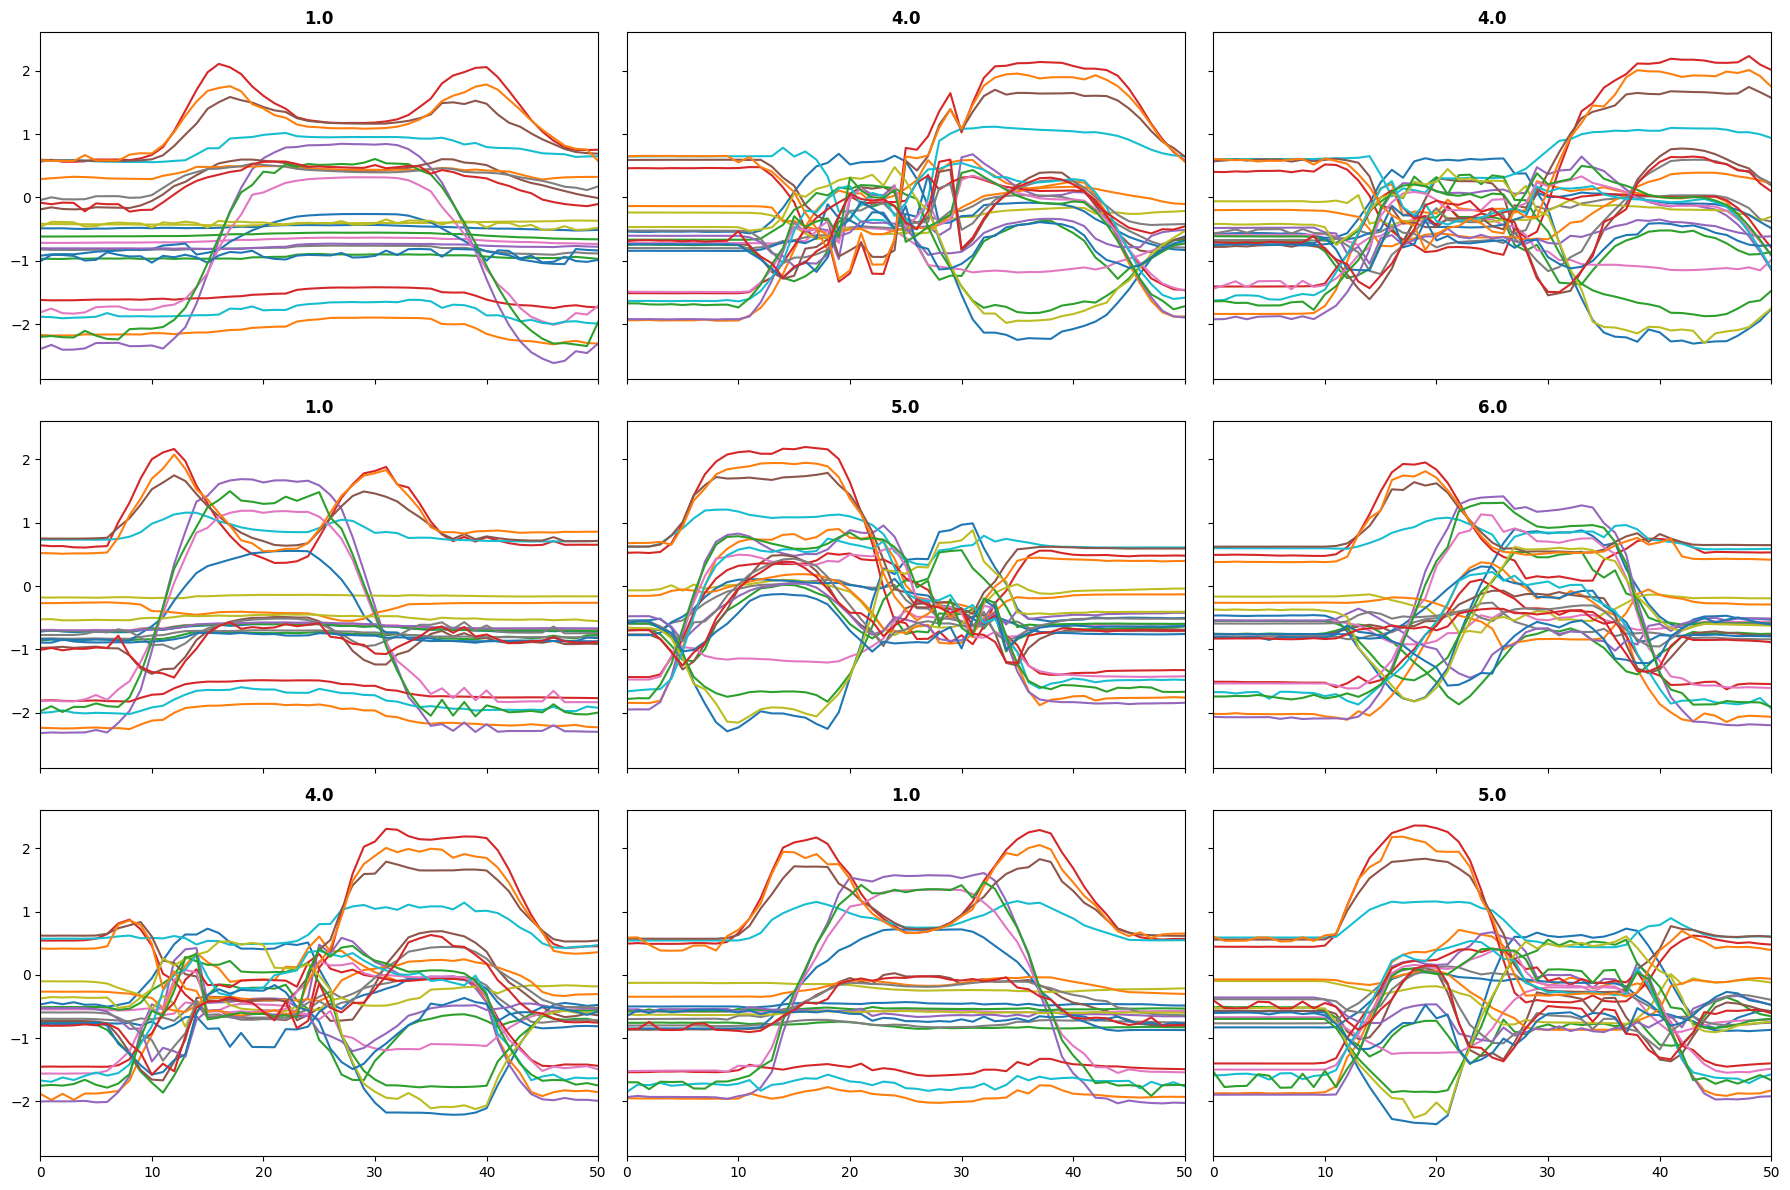

In [ ]:
dls.show_batch(sharey=True)

In [ ]:
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)

SuggestedLRs(valley=0.00363078061491251)

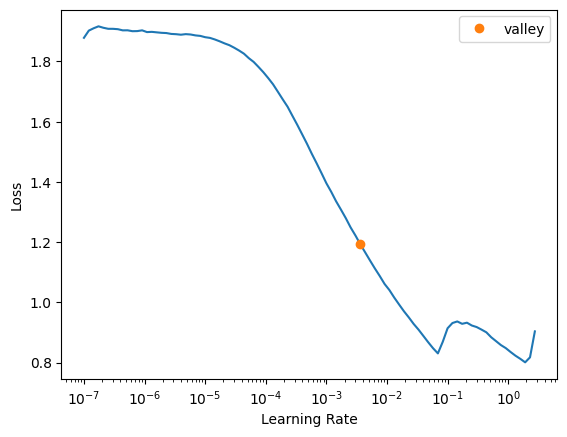

In [ ]:
learn.lr_find()

In [ ]:
learn.lr

0.001

In [ ]:
learn.fit_one_cycle(25, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.854341,1.784717,0.166667,00:01
1,1.767472,1.781423,0.166667,00:01
2,1.619219,1.775652,0.166667,00:01
3,1.443205,1.761459,0.166667,00:01
4,1.282211,1.730571,0.166667,00:01
5,1.133004,1.666420,0.266667,00:01
6,1.010733,1.556975,0.627778,00:01
7,0.910837,1.417706,0.827778,00:02
8,0.822394,1.266240,0.894444,00:02
9,0.754213,1.085961,0.877778,00:02


In [ ]:
valid_probs, valid_targets, valid_preds = learn.get_preds(dl=dls.valid, with_decoded=True)

In [ ]:
valid_probs

tensor([[0.0024, 0.0068, 0.0107, 0.9563, 0.0141, 0.0098],
        [0.0095, 0.0049, 0.0064, 0.0098, 0.9626, 0.0068],
        [0.0037, 0.0049, 0.0055, 0.0072, 0.0040, 0.9748],
        ...,
        [0.0055, 0.0038, 0.0032, 0.0087, 0.9756, 0.0031],
        [0.0014, 0.0046, 0.0065, 0.9715, 0.0097, 0.0063],
        [0.0029, 0.0039, 0.0042, 0.8584, 0.1246, 0.0060]])

In [ ]:
valid_targets

tensor([3, 4, 5, 0, 3, 2, 1, 2, 2, 0, 4, 3, 2, 4, 1, 0, 4, 0, 4, 0, 2, 3, 5, 5,
        1, 2, 1, 0, 1, 4, 2, 3, 5, 4, 3, 5, 3, 0, 3, 5, 4, 2, 1, 5, 0, 2, 4, 3,
        2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 4, 1, 4, 5, 0, 5, 1, 1, 1, 2, 4, 1, 5, 3,
        0, 3, 4, 3, 1, 4, 4, 2, 0, 3, 3, 5, 1, 5, 2, 5, 5, 4, 4, 2, 4, 3, 5, 2,
        1, 5, 0, 3, 0, 5, 3, 5, 0, 5, 5, 0, 2, 5, 0, 1, 1, 4, 1, 0, 0, 2, 4, 1,
        0, 3, 4, 3, 1, 2, 2, 2, 2, 0, 4, 0, 0, 1, 3, 4, 4, 2, 1, 1, 1, 4, 4, 3,
        1, 4, 0, 4, 5, 5, 1, 5, 3, 3, 5, 5, 4, 3, 5, 1, 3, 2, 3, 0, 1, 3, 0, 2,
        5, 2, 1, 5, 3, 1, 0, 5, 2, 4, 3, 3])

In [ ]:
valid_preds

tensor([3, 4, 5, 0, 3, 2, 2, 2, 2, 0, 4, 3, 2, 4, 1, 0, 4, 0, 4, 0, 2, 3, 5, 5,
        1, 2, 2, 0, 1, 4, 2, 3, 0, 4, 3, 5, 3, 0, 3, 5, 4, 2, 2, 5, 0, 2, 4, 3,
        2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 4, 1, 4, 5, 0, 5, 1, 1, 1, 2, 4, 1, 5, 3,
        0, 3, 4, 3, 1, 4, 4, 2, 0, 3, 3, 5, 1, 5, 2, 5, 5, 4, 4, 2, 4, 3, 5, 2,
        1, 5, 0, 3, 0, 5, 3, 5, 0, 5, 5, 0, 2, 5, 0, 1, 1, 4, 1, 0, 0, 2, 4, 1,
        0, 3, 4, 3, 1, 2, 2, 2, 2, 0, 4, 0, 0, 2, 3, 4, 4, 2, 1, 2, 1, 4, 4, 3,
        1, 4, 0, 4, 5, 5, 1, 5, 3, 3, 5, 5, 4, 3, 5, 1, 3, 1, 3, 0, 1, 3, 0, 2,
        5, 2, 1, 5, 3, 1, 0, 5, 1, 4, 3, 3])

In [ ]:
(valid_targets == valid_preds).float().mean()

tensor(0.9389)

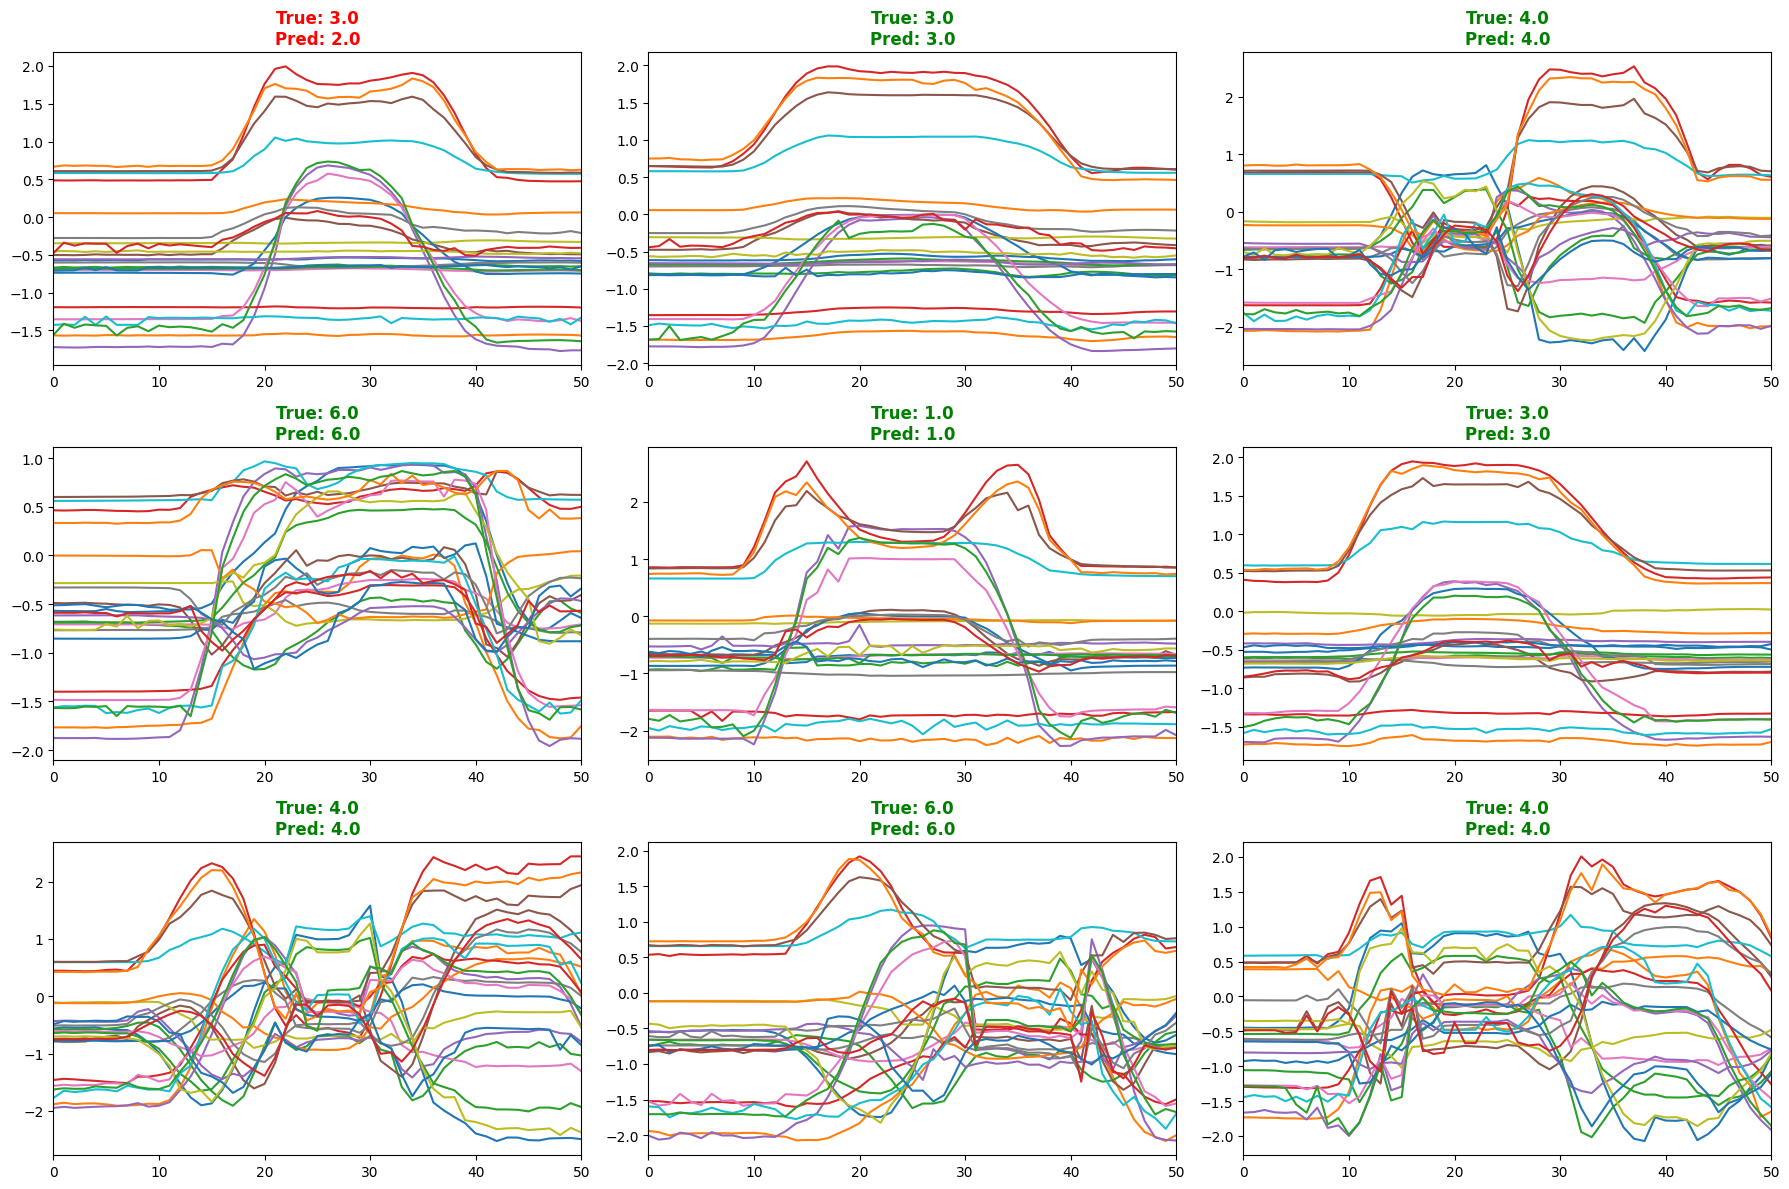

In [ ]:
learn.show_results()

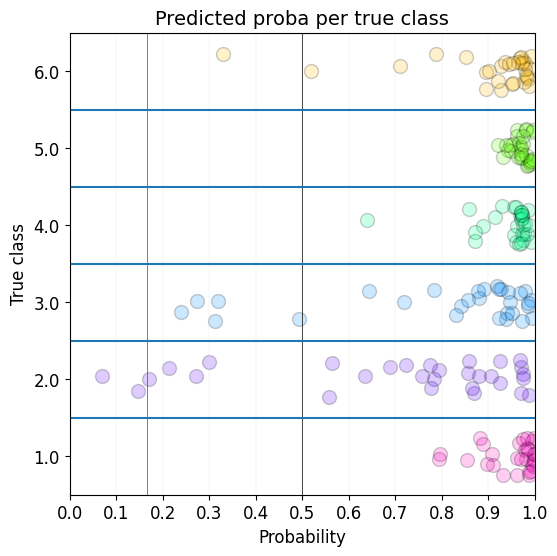

In [ ]:
learn.show_probas()

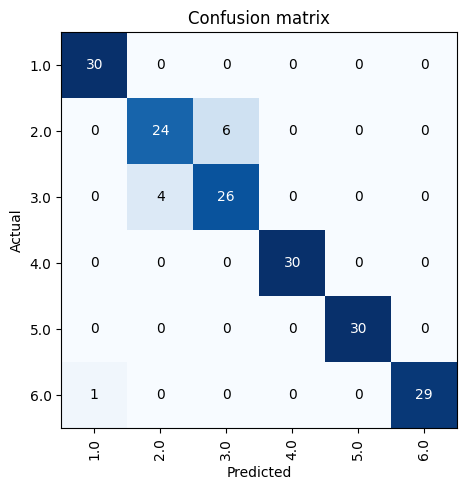

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Avaliação

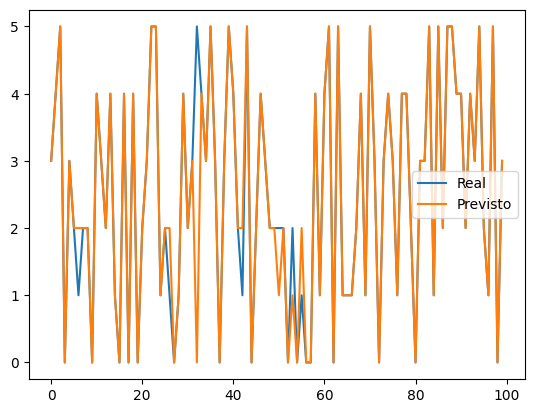

In [ ]:
plt.plot(valid_targets[:100], label="Real")
plt.plot(valid_preds[:100], label="Previsto")
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(valid_targets, valid_preds)
mae = mean_absolute_error(valid_targets, valid_preds)
rmse = np.sqrt(mse)

In [ ]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MSE: 0.19444444444444445
MAE: 0.08333333333333333
RMSE: 0.44095855184409843


Ou seja, foi uma previsão até que ok